## Assignment 2 - Group 11: Pizza House 

**Data Description**

This dataset provides insights on the housing market from the year 2016 to 2018, chosen with the purpose to help us build a model to predict the quality (utilities and benefits) of a house within a certain price range, and vice versa, with a given price, we would love to know the most suitable option for the customer's accommodation. 

Explanation for each columns in the dataset: 
- Rooms: Number of rooms
- Price: Price in dollars
- Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
- Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
- SellerG: Real Estate Agent
- Date: Date sold
- Distance: Distance from CBD
- Regionname: General Region (West, North West, North, North east …etc)
- Propertycount: Number of properties that exist in the suburb.
- Bedroom2 : Scraped # of Bedrooms (from different source)
- Bathroom: Number of Bathrooms
- Car: Number of carspots
- Landsize: Land Size
- BuildingArea: Building Size
- CouncilArea: Governing council for the area

# Data Analysis

In [378]:
# Importing necessary libraries

import matplotlib.pyplot as plt                 # Imports the Matplotlib library, which is used for creating static, interactive, and animated visualizations in Python.
                                                # 'pyplot' is a submodule within Matplotlib that provides simple functions for plotting.

import seaborn as sns                           # Imports the Seaborn library, which is built on top of Matplotlib. 
                                                # Seaborn provides a high-level interface for creating attractive statistical plots.

import numpy as np                              # Imports the NumPy library, which is used for numerical computations in Python, especially with large arrays and matrices of numerical data.
                                                # NumPy also provides mathematical functions to operate on these arrays.
                                                # It helps in performing linear algebra operations, handling arrays, and performing mathematical calculations like mean, standard deviation, etc.

import pandas as pd                             # Imports the Pandas library, which is used for data manipulation and analysis. 
                                                # Pandas provides data structures like DataFrames to work with structured data efficiently.
                                                # 'pd.read_csv()' is used to read data from CSV files and load it into a Pandas DataFrame for analysis and manipulation.


## Load the Data

In [379]:
data_set = 'https://raw.githubusercontent.com/eightteababi/Melbourne_Houses_Dataset/refs/heads/main/Melbourne_housing_FULL.csv'
# Defines the URL of the dataset (a CSV file) to be loaded. We uploaded to github to make it less dependable on the local computer 

data = pd.read_csv(data_set)
# Reads the CSV file from the URL and loads it into a Pandas DataFrame called 'data' for manipulation and analysis.

data['Log Price'] = np.log(data['Price'])
# Creates a new column 'Log Price' in the DataFrame, which contains the natural logarithm of the 'Price' column values.

With this data, we can check the shape of our datasets ( number of rows, number of columns/features )

In [380]:
data.shape

(8850, 20)

We can check the first and last 5 rows of the data:

In [381]:
print(data.head())

      Suburb          Address  Rooms Type   Price Method        SellerG  \
0  Reservoir  273 Mahoneys Rd      3    h  601000      S           Love   
1  Reservoir   3 Sheargold Ct      3    h  475000      S         Nelson   
2  Reservoir     36 Anstey Av      3    h  600000     PI            Ray   
3  Reservoir    5 Bluebell Pl      4    h  851000      S  hockingstuart   
4  Reservoir     8 Bedwell St      4    h  750000     PI            Ray   

         Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0  25/02/2017      11.2      3073         3         1    2       460   
1  18/06/2016      11.2      3073         3         1    1       535   
2    6/1/2018      12.0      3073         3         1    2       534   
3   7/11/2016      11.2      3073         4         2    2       581   
4  12/11/2016      11.2      3073         4         2    4       820   

   BuildingArea  YearBuilt           CouncilArea             Regionname  \
0         102.0       1965  Darebin City 

In [382]:
print(data.tail())

                  Suburb        Address  Rooms Type    Price Method SellerG  \
8845  Strathmore Heights  19A Tasman Av      3    t   800000     VB  Nelson   
8846  Strathmore Heights   12 Boeing Rd      4    h   931999      S  Nelson   
8847  Strathmore Heights    4 Boeing Rd      4    h  1260000      S  Nelson   
8848      Gisborne South  47 Tweddle Rd      4    h  1350000     SA      RT   
8849        Bullengarook  11 Dohoney Rd      4    h   865000      S   Raine   

            Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
8845   9/12/2017       8.2      3041         3         2    2       306   
8846  12/11/2016      12.5      3041         4         3    2       528   
8847   10/9/2016      12.5      3041         4         2    2       697   
8848  25/11/2017      45.9      3437         4         2    8     40469   
8849  24/02/2018      45.9      3437         4         2    0     42800   

      BuildingArea  YearBuilt                   CouncilArea  \
8845       

Let's check the random thirteen number of data samples, Every time the code runs, it will print out 13 samples in the dataset, chosen randomly. This gives us a better view of what the data looks like in general. 

In [383]:
data.sample(13)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount,Log Price
7848,Clarinda,4 Allambi Ct,4,h,990000,S,C21,24/02/2018,17.5,3169,4,2,2,667,150.0,1982,Kingston City Council,South-Eastern Metropolitan,2727,13.805460
8813,Caulfield East,75 Grange Rd,5,h,1335000,S,Gary,16/07/2016,9.3,3145,5,2,1,521,208.0,1915,Glen Eira City Council,Southern Metropolitan,608,14.104442
2296,Tarneit,2 Skylark Ct,3,h,526000,S,Purplebricks,1/7/2017,18.4,3029,3,2,2,407,146.0,2010,Wyndham City Council,Western Metropolitan,10160,13.173056
7179,Ormond,28 Garfield Av,4,h,1450000,VB,Woodards,23/09/2017,11.4,3204,4,2,2,590,178.0,1940,Glen Eira City Council,Southern Metropolitan,3578,14.187074
7238,Doveton,5 Hakea St,3,h,469000,SP,C21,16/09/2017,28.8,3177,3,1,2,585,101.0,1959,Casey City Council,South-Eastern Metropolitan,3533,13.058358
6890,Maidstone,19 Norfolk St,2,h,711000,S,Jas,3/12/2016,9.2,3012,2,1,0,163,69.0,1920,Maribyrnong City Council,Western Metropolitan,3873,13.474428
3154,Southbank,6/85 Dodds St,4,u,1250000,S,Kay,12/11/2016,1.2,3006,4,3,1,0,176.0,2000,Melbourne City Council,Southern Metropolitan,8400,14.038654
6755,Vermont,11 Manhattan Sq,4,h,980000,S,hockingstuart,12/8/2017,17.2,3133,4,2,0,539,192.0,1978,Maroondah City Council,Eastern Metropolitan,4181,13.795308
7148,Chadstone,4/5 Rae St,3,h,650000,PI,hockingstuart,15/10/2016,13.6,3148,3,2,2,160,101.0,2000,Monash City Council,Southern Metropolitan,3582,13.384728
5429,Newport,1 Durkin St,2,h,740000,S,RT,16/04/2016,8.4,3015,2,2,1,213,127.0,2006,Hobsons Bay City Council,Western Metropolitan,5498,13.514405


Let's check the format of all of the available columns: 

In [384]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8850 entries, 0 to 8849
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         8850 non-null   object 
 1   Address        8850 non-null   object 
 2   Rooms          8850 non-null   int64  
 3   Type           8850 non-null   object 
 4   Price          8850 non-null   int64  
 5   Method         8850 non-null   object 
 6   SellerG        8850 non-null   object 
 7   Date           8850 non-null   object 
 8   Distance       8850 non-null   float64
 9   Postcode       8850 non-null   int64  
 10  Bedroom2       8850 non-null   int64  
 11  Bathroom       8850 non-null   int64  
 12  Car            8850 non-null   int64  
 13  Landsize       8850 non-null   int64  
 14  BuildingArea   8850 non-null   float64
 15  YearBuilt      8850 non-null   int64  
 16  CouncilArea    8850 non-null   object 
 17  Regionname     8850 non-null   object 
 18  Property

As we can see in the output.

- There are 8850 entries
- There are 20 features in total (indexed from 0 to 19)
- There are three types of datatype types: float64(12), int64(1), object(8)
- Memory usage: 1.4+ MB
- The Non-Null Count column gives us insights into how many values are missing (it is evident that all values are available after the data cleaning process)

Now, we can check the overall values of the data

In [385]:
# Transpose the descriptive statistics
transposed_summary = data.describe().T

# Display the transposed summary
transposed_summary


,count,mean,std,min,25%,50%,75%,max
Rooms,8850.0,3.098644e+00,0.963973,1.000000,2.000000,3.00000,4.000000e+00,1.200000e+01
Price,8850.0,1.091784e+06,679802.041144,131000.000000,640000.000000,900000.00000,1.340750e+06,9.000000e+06
Distance,8850.0,1.120533e+01,6.827158,0.000000,6.400000,10.20000,1.390000e+01,4.740000e+01
Postcode,8850.0,3.111728e+03,112.985858,3000.000000,3044.000000,3083.00000,3.150000e+03,3.977000e+03
Bedroom2,8850.0,3.078305e+00,0.966657,0.000000,2.000000,3.00000,4.000000e+00,1.200000e+01
Bathroom,8850.0,1.645876e+00,0.721165,1.000000,1.000000,2.00000,2.000000e+00,9.000000e+00
Car,8850.0,1.691525e+00,0.975219,0.000000,1.000000,2.00000,2.000000e+00,1.000000e+01
Landsize,8850.0,5.239256e+02,1063.402646,0.000000,213.000000,478.00000,6.520000e+02,4.280000e+04
BuildingArea,8850.0,1.491992e+02,87.737043,0.000000,100.000000,132.00000,1.800000e+02,3.112000e+03
YearBuilt,8850.0,1.965764e+03,37.064712,1196.000000,1945.000000,1970.00000,2.000000e+03,2.019000e+03


We can further inspect our data by extracting the number of categorical and numerical features, and see how many unique values we have got:

Categorical Features

In [386]:
numeric_features = data.select_dtypes(['int', 'float']).columns

print(numeric_features)

print("\nNumber of `Numerical` Features are:", len(numeric_features) )

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount', 'Log Price'],
      dtype='object')

Number of `Numerical` Features are: 12


In [387]:
print("Total Records :", len(data) )

for col in numeric_features:
    print("Total Unique Records of "+ col + " =",  len(data[col].unique()))

Total Records : 8850
Total Unique Records of Rooms = 10
Total Unique Records of Price = 1844
Total Unique Records of Distance = 201
Total Unique Records of Postcode = 194
Total Unique Records of Bedroom2 = 12
Total Unique Records of Bathroom = 9
Total Unique Records of Car = 11
Total Unique Records of Landsize = 1238
Total Unique Records of BuildingArea = 591
Total Unique Records of YearBuilt = 143
Total Unique Records of Propertycount = 312
Total Unique Records of Log Price = 1844


Numerical Features

In [388]:
categorical_features = data.select_dtypes('object').columns

categorical_features, len(categorical_features)

print("Number of `Categorical` Features are:", len(categorical_features) )

Number of `Categorical` Features are: 8


In [389]:
print("Total Records :", len(data) )

for col in categorical_features:
    print("Total Unique Records of "+ col + " =",  len(data[col].unique()))

Total Records : 8850
Total Unique Records of Suburb = 315
Total Unique Records of Address = 8727
Total Unique Records of Type = 3
Total Unique Records of Method = 5
Total Unique Records of SellerG = 250
Total Unique Records of Date = 77
Total Unique Records of CouncilArea = 33
Total Unique Records of Regionname = 8


**Finding Missing Values**

It is possible to inspect how many missing values are there in our dataset. For this assignment, we manually filtered out all the entries that have missing, so from the report below it seems that there are no longer any missing values.

In [390]:
data.isna().sum().sort_values(ascending=False)

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Regionname       0
Propertycount    0
Log Price        0
dtype: int64

We can also convert the number of missing values into percentages, this way we can observe more clearly the weight of the missing values on our dataset. 

In [391]:
(data.isna().sum() * 100 / data.isna().count()).sort_values(ascending=False)

Suburb           0.0
Address          0.0
Rooms            0.0
Type             0.0
Price            0.0
Method           0.0
SellerG          0.0
Date             0.0
Distance         0.0
Postcode         0.0
Bedroom2         0.0
Bathroom         0.0
Car              0.0
Landsize         0.0
BuildingArea     0.0
YearBuilt        0.0
CouncilArea      0.0
Regionname       0.0
Propertycount    0.0
Log Price        0.0
dtype: float64

To observe more clearly what the original dataset, before we manually filter out all the values, we can inspect it here using the same methods:

In [392]:
original_dataset = 'https://raw.githubusercontent.com/eightteababi/Melbourne_Houses_Dataset/refs/heads/main/Melbourne_housing_Ori.csv'
original = pd.read_csv(original_dataset)

original.isna().sum().sort_values(ascending=False)

BuildingArea     21115
YearBuilt        19306
Landsize         11810
Car               8728
Bathroom          8226
Bedroom2          8217
Lattitude         7976
Longtitude        7976
Price             7610
Regionname           3
CouncilArea          3
Propertycount        3
Distance             1
Postcode             1
Rooms                0
Address              0
Suburb               0
Type                 0
SellerG              0
Date                 0
Method               0
dtype: int64

In [393]:
(original.isna().sum() * 100 / original.isna().count()).sort_values(ascending=False)

BuildingArea     60.576068
YearBuilt        55.386293
Landsize         33.881286
Car              25.039447
Bathroom         23.599277
Bedroom2         23.573457
Lattitude        22.882061
Longtitude       22.882061
Price            21.832057
Regionname        0.008607
CouncilArea       0.008607
Propertycount     0.008607
Distance          0.002869
Postcode          0.002869
Rooms             0.000000
Address           0.000000
Suburb            0.000000
Type              0.000000
SellerG           0.000000
Date              0.000000
Method            0.000000
dtype: float64

The reason why we chose to filter out all the entries that have missing values was that we hope to use the most accurate data possible to perform visualization and model training. However, we acknowledge that it is possible to fill in the missing values of the original dataset, although we do not wholeheartedly support this method, since it might skew the data in unexpected ways and make it less realistic. 
Nonetheless, filling in the missing data can be achieved as below: 

In [394]:
original[['BuildingArea', 'YearBuilt', 'CouncilArea', 'Car', 'Landsize', 'Car', 'Bathroom', 'Bedroom2', 'Lattitude', 'Longtitude', 'Price', 'Regionname', 'Propertycount', 'Distance', 'Postcode']].describe(include='all')

,BuildingArea,YearBuilt,CouncilArea,Car,Landsize,Car,Bathroom,Bedroom2,Lattitude,Longtitude,Price,Regionname,Propertycount,Distance,Postcode
count,13742.00000,15551.000000,34854,26129.000000,23047.000000,26129.000000,26631.000000,26640.000000,26881.000000,26881.000000,2.724700e+04,34854,34854.000000,34856.000000,34856.000000
unique,NaN,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN
top,NaN,NaN,Boroondara City Council,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,NaN,NaN,NaN
freq,NaN,NaN,3675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11836,NaN,NaN,NaN
mean,160.25640,1965.289885,NaN,1.728845,593.598993,1.728845,1.624798,3.084647,-37.810634,145.001851,1.050173e+06,NaN,7572.888306,11.184929,3116.062859
std,401.26706,37.328178,NaN,1.010771,3398.841946,1.010771,0.724212,0.980690,0.090279,0.120169,6.414671e+05,NaN,4428.090313,6.788892,109.023903
min,0.00000,1196.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,-38.190430,144.423790,8.500000e+04,NaN,83.000000,0.000000,3000.000000
25%,102.00000,1940.000000,NaN,1.000000,224.000000,1.000000,1.000000,2.000000,-37.862950,144.933500,6.350000e+05,NaN,4385.000000,6.400000,3051.000000
50%,136.00000,1970.000000,NaN,2.000000,521.000000,2.000000,2.000000,3.000000,-37.807600,145.007800,8.700000e+05,NaN,6763.000000,10.300000,3103.000000
75%,188.00000,2000.000000,NaN,2.000000,670.000000,2.000000,2.000000,4.000000,-37.754100,145.071900,1.295000e+06,NaN,10412.000000,14.000000,3156.000000


For Categorical features, to avoid altering the results too much, we can choose to fill them in with the highest occurrence value. In this case, highest occurrence value is 'Boroondara City Council' for 'CouncilArea' and 'Southern Metropolitan' for Regionname. so we use these values to fill. For other features, we fill them in with mean(), median(), and mode() where it is suitable.

1. Mean (mean()): The arithmetic average of a set of numbers, calculated by summing all the values and dividing by the number of values. It’s used to estimate missing numerical data based on the overall trend of the dataset. For this code, it's applied to fill missing values for continuous variables: BuildingArea, Landsize, Latitude, Longitude, Price, Propertycount, and Distance.

2. Median (median()): The middle value of a dataset when the values are arranged in ascending order. If the dataset has an even number of values, the median is the average of the two middle values. It’s less sensitive to outliers than the mean. In the code, the median is used to fill missing values for Car, Bathroom, Bedroom2, and Postcode, which represents countable quantities where the median might better reflect the typical values.

3. Mode (mode()): The value that appears most frequently in a dataset. It is best to fill in categorical or discrete variables. For this code, the mode is used to fill missing values for YearBuilt, as this field may often contain repeated values (e.g., many houses built in the same year).

In [395]:
original['CouncilArea'] = original['CouncilArea'].fillna('Boroondara City Council')
original['Regionname'] = original['CouncilArea'].fillna('Southern Metropolitan')


original['YearBuilt'] = original['YearBuilt'].fillna(original['YearBuilt'].mode()[0])

original['BuildingArea'] = original['BuildingArea'].fillna(original['BuildingArea'].mean())
original['Landsize'] = original['Landsize'].fillna(original['Landsize'].mean())
original['Lattitude'] = original['Lattitude'].fillna(original['Lattitude'].mean())
original['Longtitude'] = original['Longtitude'].fillna(original['Longtitude'].mean())
original['Price'] = original['Price'].fillna(original['Price'].mean())
original['Propertycount'] = original['Propertycount'].fillna(original['Propertycount'].mean())
original['Distance'] = original['Distance'].fillna(original['Distance'].mean())

original['Car'] = original['Car'].fillna(original['Car'].median())
original['Bathroom'] = original['Bathroom'].fillna(original['Bathroom'].median())
original['Bedroom2'] = original['Bedroom2'].fillna(original['Bedroom2'].median())
original['Postcode'] = original['Postcode'].fillna(original['Postcode'].median())

We can check that there are no longer any missing values n the original data:

In [396]:
original.isna().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car              False
Landsize         False
BuildingArea     False
YearBuilt        False
CouncilArea      False
Lattitude        False
Longtitude       False
Regionname       False
Propertycount    False
dtype: bool

## Visualization:

**1. Price Distribution using Histogram**

In [397]:
# Group by Postcode and find the min, max, and median prices for each suburb
suburb_stats = data.groupby('Postcode')['Price'].agg(['min', 'max', 'median']).reset_index()

# Find the overall minimum, maximum, and median price
min_price_row = data.loc[data['Price'].idxmin()]
max_price_row = data.loc[data['Price'].idxmax()]
median_price = data['Price'].median()

# Display the suburb and property details for the min, max, and median prices
print(f"Suburb with Minimum price: {min_price_row['Postcode']} - ${min_price_row['Price']:,} ({min_price_row['Rooms']} bedroom, {min_price_row['Bathroom']} bathroom, {min_price_row['Car']} car)")
print(f"Suburb with Maximum price: {max_price_row['Postcode']} - ${max_price_row['Price']:,} ({max_price_row['Rooms']} bedroom, {max_price_row['Bathroom']} bathroom, {max_price_row['Car']} car)")
print(f"Overall Median price: ${median_price:,.0f} (approximate)")


Suburb with Minimum price: 3162 - $131,000 (4 bedroom, 1 bathroom, 2 car)
Suburb with Maximum price: 3170 - $9,000,000 (3 bedroom, 1 bathroom, 1 car)
Overall Median price: $900,000 (approximate)


Note: 3162 is the Postcode for Caulfield, and 3170 is the postcode for Mulgrave.

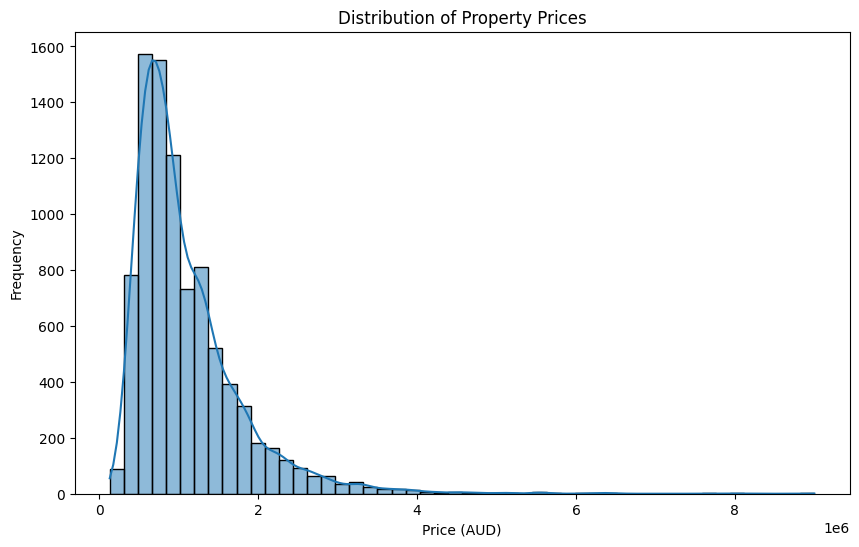

In [398]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=50, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price (AUD)')
plt.ylabel('Frequency')
plt.show()

**2. Price by Property Type using Boxplot**

- h - House
- t - Town House
- u - Unit

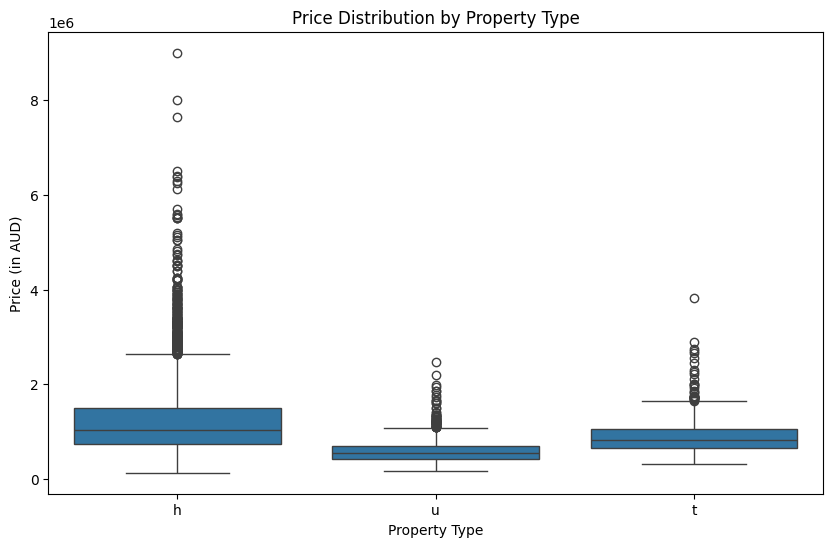

In [399]:
plt.figure(figsize = (10, 6))
sns.boxplot(x='Type', y='Price', data=data)
plt.title('Price Distribution by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price (in AUD)')
plt.show()

**3. Correlation matrix**

- Price vs. Number of Rooms: Strong positive correlation
- Price vs. Suburb: Significant variation in prices across suburbs
- Price vs. Property Type: Houses generally more expensive than units or townhouses
- Price vs. Sale Method: Potential differences in price based on sale method

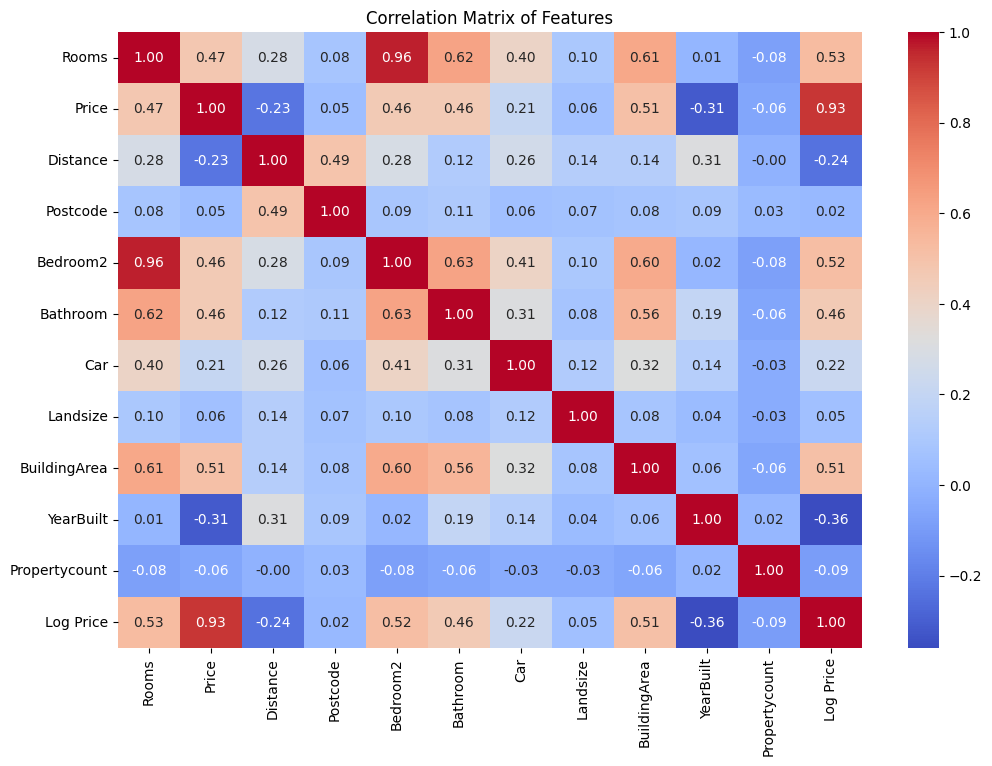

In [400]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

**4. Inspecting Sale Methods:**

The dataset includes various sale methods:

- S: Property sold
- SP: Property sold prior
- PI: Property passed in
- VB: Vendor bid


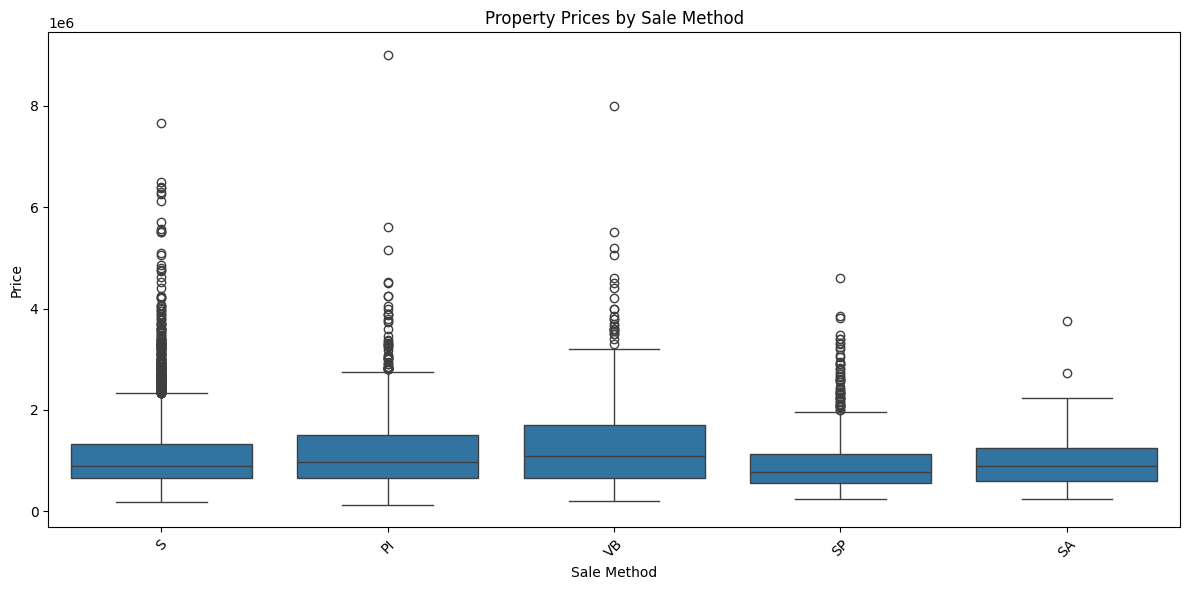

C:\Users\Eight Tea Pea\AppData\Local\Temp\ipykernel_18960\968375178.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Method', y = 'Price', data = average_price, palette='viridis')


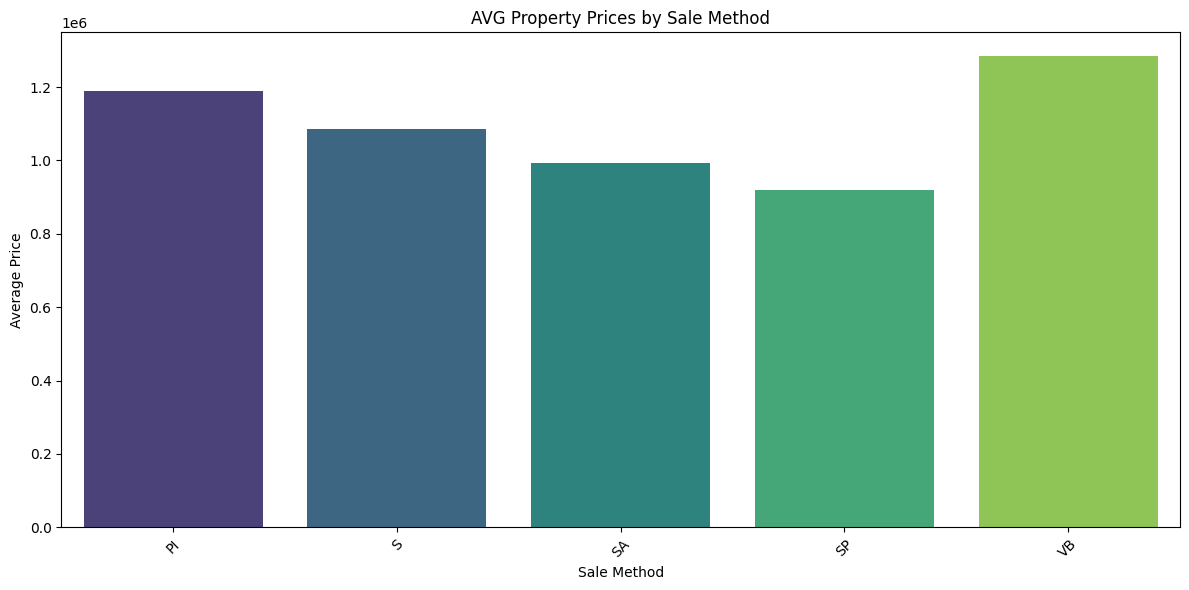

In [401]:
data = data.dropna(subset=['Method', 'Price'])

plt.figure(figsize = (12, 6))
sns.boxplot(x='Method', y='Price', data = data)
plt.title('Property Prices by Sale Method')
plt.xlabel('Sale Method')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

average_price = data.groupby('Method')['Price'].mean().reset_index()

plt.figure(figsize = (12, 6))
sns.barplot(x = 'Method', y = 'Price', data = average_price, palette='viridis')
plt.title('AVG Property Prices by Sale Method')
plt.xlabel('Sale Method')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**5. Inspecting Number of Rooms:**

In [402]:
# Group by the number of rooms and calculate the mean price
room_avg_prices = data.groupby('Rooms')['Price'].mean().sort_index()

# Format and display the average prices
print("Average house price in accordance with the number of rooms:")
for rooms, price in room_avg_prices.items():
        print(f"- {rooms} = ${price:,.0f}")

Average house price in accordance with the number of rooms:
- 1 = $418,665
- 2 = $747,280
- 3 = $1,033,256
- 4 = $1,382,575
- 5 = $1,881,873
- 6 = $2,128,098
- 7 = $1,914,571
- 8 = $1,335,500
- 10 = $2,315,000
- 12 = $710,000


In [403]:
# Group by the number of rooms and count the occurrences
room_counts = data['Rooms'].value_counts().sort_index()

# Display the number of houses for each number of rooms
print("Number of houses for each number of rooms:")
for rooms, count in room_counts.items():
    if rooms == 1: 
        print(f"- {rooms} room: {count} houses")
    else: 
        print(f"- {rooms} rooms: {count} houses")

Number of houses for each number of rooms:
- 1 room: 340 houses
- 2 rooms: 1902 houses
- 3 rooms: 3810 houses
- 4 rooms: 2230 houses
- 5 rooms: 504 houses
- 6 rooms: 51 houses
- 7 rooms: 7 houses
- 8 rooms: 4 houses
- 10 rooms: 1 houses
- 12 rooms: 1 houses


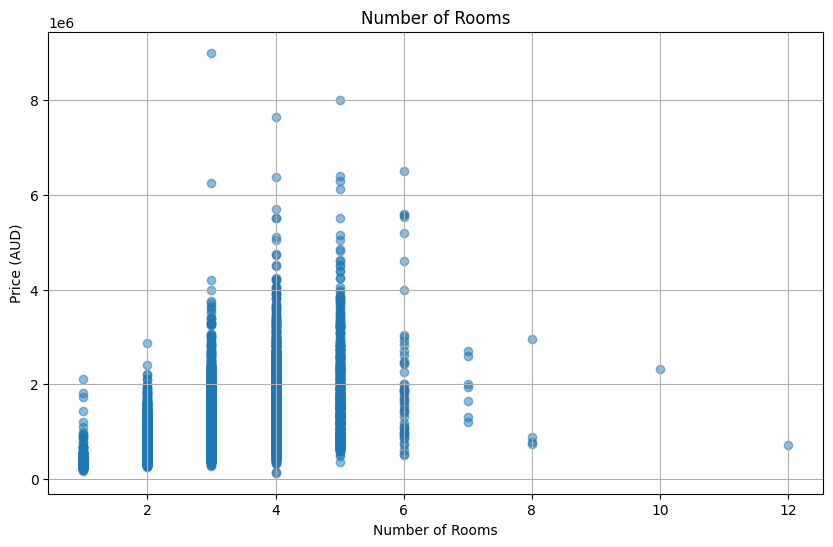

In [404]:
plt.figure(figsize = (10, 6))
plt.scatter(data['Rooms'], data['Price'], alpha=0.5)
plt.title('Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Price (AUD)')
plt.grid(True)
plt.show()

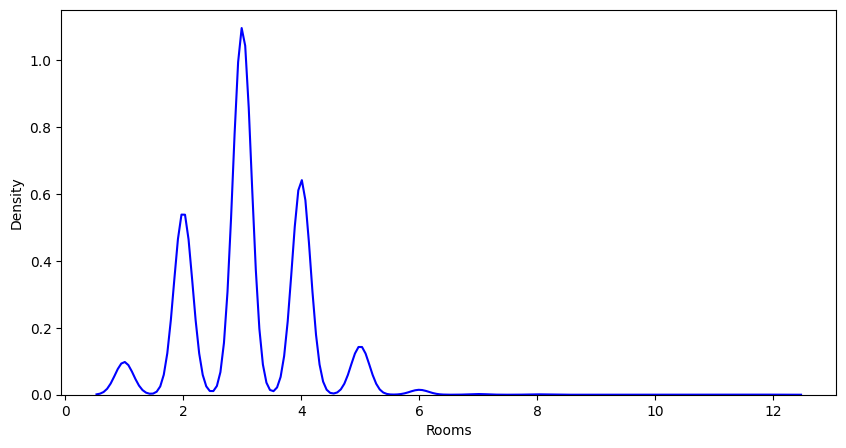

In [405]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data.Rooms, label='Rooms', color='b');

**5. Inspecting House Price by Date:**

C:\Users\Eight Tea Pea\AppData\Local\Temp\ipykernel_18960\2838442045.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Sale Date'] = pd.to_datetime(data['Date'], errors='coerce')


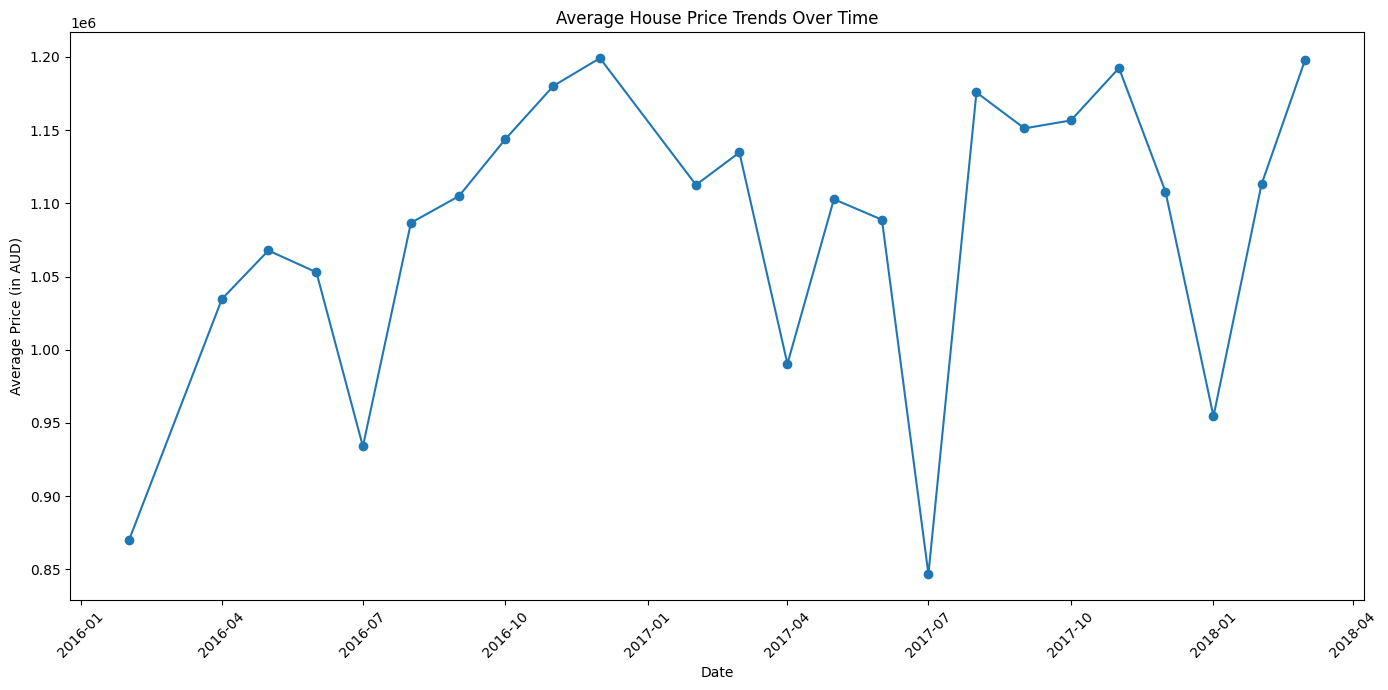

In [406]:
data['Sale Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data.dropna(subset = ['Sale Date', 'Price'])
time_series_data = data.groupby(data['Sale Date'].dt.to_period("M"))['Price'].mean()

plt.figure(figsize = (14, 7))
plt.plot(time_series_data.index.to_timestamp(), time_series_data, marker='o')
plt.title('Average House Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price (in AUD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**6. Inspecting the housing market on the year a house was built:**

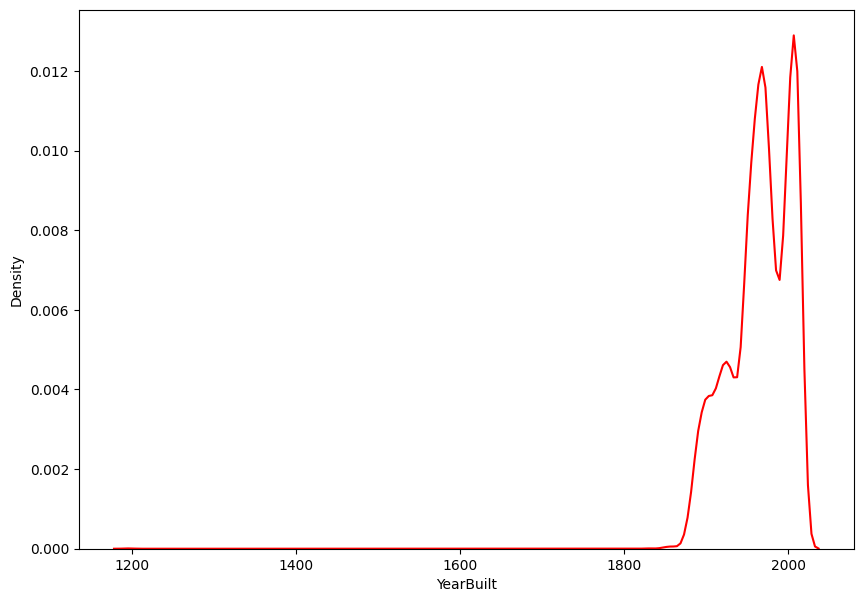

In [407]:
plt.figure(figsize=(10, 7))
sns.kdeplot(data.YearBuilt, label='YearBuilt', color='r');

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------












## Model Training

## Model Type 1: Regression Models

To train the regression models, it is better to convert the categorical values in our dataset into numerical values.

In [408]:
data[categorical_features].value_counts()

Suburb      Address              Type  Method  SellerG        Date        CouncilArea               Regionname           
Yarraville  96 Pentland Pde      h     VB      hockingstuart  9/9/2017    Maribyrnong City Council  Western Metropolitan     1
Abbotsford  1/43 Abbotsford St   u     PI      Nelson         27/05/2017  Yarra City Council        Northern Metropolitan    1
Yarraville  7 Hughes St          h     S       Village        28/08/2016  Maribyrnong City Council  Western Metropolitan     1
            66 Drew St           h     S       hockingstuart  22/04/2017  Maribyrnong City Council  Western Metropolitan     1
            64 Bishop St         h     S       hockingstuart  16/04/2016  Maribyrnong City Council  Western Metropolitan     1
                                                                                                                            ..
Abbotsford  133 Yarra St         h     S       Biggin         22/07/2017  Yarra City Council        Northern Metropo

Implementing LabelEncoder to convert categorical values to numerical values.

In [409]:
#  Import LabelEncoder from sklearn.preproccessing module
from sklearn.preprocessing import LabelEncoder

In [410]:
# Iterate through each column in the list of categorical features
for column in categorical_features:
    
    l_encoder = LabelEncoder()                                              # Create an instance of the LabelEncoder class
    data[column] = l_encoder.fit_transform(data[column])                    # Fit the LabelEncoder on the current column and transform the data, replacing the original column with the encoded values

data[categorical_features].value_counts()                                   # Count the unique occurrences of each category in the categorical features


Suburb  Address  Type  Method  SellerG  Date  CouncilArea  Regionname
314     8686     0     4       241      76    16           6             1
0       440      2     0       147      46    31           2             1
314     7670     0     1       222      50    16           6             1
        7491     0     1       241      32    16           6             1
        7439     0     1       241      17    16           6             1
                                                                        ..
0       1611     0     1       22       34    31           2             1
        1603     0     3       22       73    31           2             1
        1368     0     1       147      71    31           2             1
        1362     2     1       22       8     31           2             1
        1042     2     1       147      43    31           2             1
Name: count, Length: 8850, dtype: int64

Creating a training feature to encapsulate all the categories we use to train the models. 

In [411]:
training_features = list(numeric_features) + list(categorical_features)

# Remove 'Price' Feature from list
training_features.remove('Price')

# show the final list
training_features

['Rooms',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Propertycount',
 'Log Price',
 'Suburb',
 'Address',
 'Type',
 'Method',
 'SellerG',
 'Date',
 'CouncilArea',
 'Regionname']

Scaling Dataset

We can use MinMaxScaler to normalize the dataset.

The MinMaxScaler is a feature scaling technique, used to transforms features by scaling them to a specified range, typically between 0 and 1. This can come into handy when working with algorithms that rely on distance calculations or sensitive to the scale of data.

In [412]:
from sklearn.preprocessing import MinMaxScaler

In [413]:
# normalize the data for training and testing
minMaxNorm = MinMaxScaler()

minMaxNorm.fit(data[training_features])

MinMaxScaler()

Create an X data variable and assign to it the training features.

In [414]:
X = minMaxNorm.transform(data[training_features]) 
X

array([[0.18181818, 0.23628692, 0.07471853, ..., 0.53947368, 0.1875    ,
        0.28571429],
       [0.18181818, 0.23628692, 0.07471853, ..., 0.32894737, 0.1875    ,
        0.28571429],
       [0.18181818, 0.25316456, 0.07471853, ..., 0.86842105, 0.1875    ,
        0.28571429],
       ...,
       [0.27272727, 0.26371308, 0.0419652 , ..., 0.05263158, 0.6875    ,
        0.85714286],
       [0.27272727, 0.96835443, 0.44728762, ..., 0.55263158, 0.4375    ,
        0.42857143],
       [0.27272727, 0.96835443, 0.44728762, ..., 0.5       , 0.4375    ,
        0.42857143]])

Create the Y variable. We hope to train a model that can predict the price according to the all the utilities needed by the customer. 

In [415]:
Y = data['Price']  
Y

0        601000
1        475000
2        600000
3        851000
4        750000
         ...   
8845     800000
8846     931999
8847    1260000
8848    1350000
8849     865000
Name: Price, Length: 8850, dtype: int64

Split Train and Test Dataset
Split the Dataset to train and to test. 

In [416]:
from sklearn.model_selection import train_test_split

In [417]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [418]:
# Check the train and test sizes
print("Total size: ", data.shape[0])
print("Train size: ", X_train.shape, Y_train.shape)
print("Test size: ", X_test.shape, Y_test.shape)

Total size:  8850
Train size:  (7080, 19) (7080,)
Test size:  (1770, 19) (1770,)


## Model Building

Before implementing our regression models, we can create a dataframe to stores all the quantifying attributes of the models to compare them among each other.

In [419]:
models_summary = pd.DataFrame([],
                              columns=['model_name', 
                                       'prediction_score',
                                       'mean_absolute_error',
                                       'mean_squared_error',
                                       'R^2 score'
                                      ])

models_summary

,model_name,prediction_score,mean_absolute_error,mean_squared_error,R^2 score


**1. Linear Regression Model**

In [420]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error

In [421]:
linear_regression = LinearRegression()

linear_regression.fit(X_train, Y_train)

LinearRegression()

In [422]:
linear_regression_predict = linear_regression.predict(X_test)
linear_regression_predict

array([ 913246.5462109 ,  936030.92133557,  716756.23994638, ...,
         28041.2082063 ,  926365.90592376, 2278024.70923566])

In [423]:
linear_regression_score = linear_regression.score(X_test, Y_test )

linear_regression_score

0.8591342806087195

In [424]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate regression metrics
mse = mean_squared_error(Y_test, linear_regression_predict)
r2 = r2_score(Y_test, linear_regression_predict)
m_a_err = mean_absolute_error(linear_regression_predict, Y_test)

# Print regression metrics
print(f"Linear Regression Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {m_a_err:.2f}")

Linear Regression Metrics:
Mean Squared Error: 73700092307.52
R² Score: 0.86
Mean Absolute Error: 155181.44


Stpre the model and its prediction score for better comparison down the line. 

In [425]:
# Create a new row for the model 
new_row = pd.DataFrame({
    'model_name': [linear_regression.__class__.__name__],
    'prediction_score': [linear_regression_score],
    'mean_absolute_error': [m_a_err],
    'mean_squared_error': [mse],
    'R^2 score': [r2]
})

# Use pd.concat() to append the new row to the existing DataFrame
models_summary = pd.concat([models_summary, new_row], ignore_index=True)

# Display the updated DataFrame
models_summary

C:\Users\Eight Tea Pea\AppData\Local\Temp\ipykernel_18960\2206813374.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  models_summary = pd.concat([models_summary, new_row], ignore_index=True)


,model_name,prediction_score,mean_absolute_error,mean_squared_error,R^2 score
0,LinearRegression,0.859134,155181.442875,7.370009e+10,0.859134


An illustration of how the model performs:

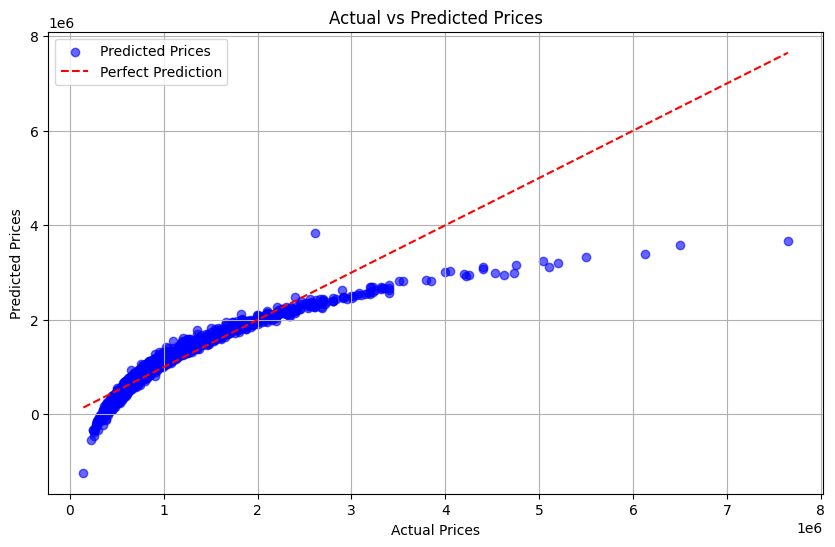

In [426]:
import matplotlib.pyplot as plt

# Function to visualize predictions vs actual values
def plot_predictions_vs_actual(Y_test, linear_regression_predict, feature, feature_data):
    plt.figure(figsize=(10, 6))
    
    # Scatter plot of actual vs predicted prices
    plt.scatter(Y_test, linear_regression_predict, alpha=0.6, color='blue', label='Predicted Prices')
    
    # Plotting the line of perfect predictions
    plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
    
    # Labeling the axes
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs Predicted Prices')
    plt.legend()
    plt.grid()
    plt.show()

# Visualize predictions vs actual prices
plot_predictions_vs_actual(Y_test, linear_regression_predict, 'Rooms', X_test[:, 0])  # You can change 'Rooms' to another feature if needed


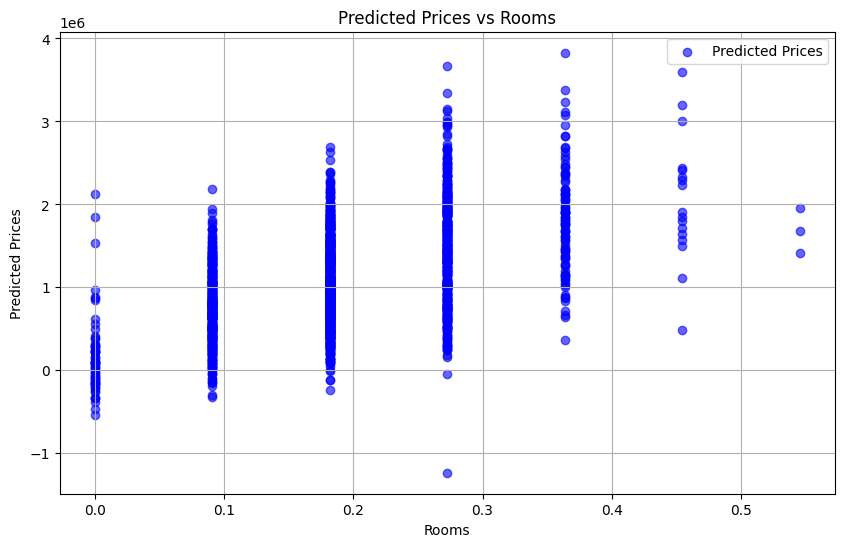

In [427]:
# Function to visualize predictions against a specific feature
def plot_feature_vs_predictions(X_test, Y_test, linear_regression_predict, feature_index, feature_name):
    plt.figure(figsize=(10, 6))

    # Scatter plot of feature vs predicted prices
    plt.scatter(X_test[:, feature_index], linear_regression_predict, alpha=0.6, color='blue', label='Predicted Prices')
    
    # Labeling the axes
    plt.xlabel(feature_name)
    plt.ylabel('Predicted Prices')
    plt.title(f'Predicted Prices vs {feature_name}')
    plt.grid()
    plt.legend()
    plt.show()

# Visualize predictions against the feature 'Rooms'
plot_feature_vs_predictions(X_test, Y_test, linear_regression_predict, 0, 'Rooms') 


**2. Decision Tree Regressor Model:**

In [428]:
from sklearn.tree import DecisionTreeRegressor

In [429]:
decision_tree = DecisionTreeRegressor(random_state=1)

decision_tree.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=1)

In [430]:
decision_tree_predict = decision_tree.predict(X_test)

decision_tree_score = decision_tree.score(X_test, Y_test)
decision_tree_score

0.9993312968732319

In [431]:
# 3. Evaluate regression metrics
dtree_mse = mean_squared_error(Y_test, decision_tree_predict)
dtree_r2 = r2_score(Y_test, decision_tree_predict)
dtree_mae = mean_absolute_error(decision_tree_predict, Y_test)

# Print regression metrics
print(f"Decision Tree Regression Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {dtree_mae:.2f}")

Decision Tree Regression Metrics:
Mean Squared Error: 73700092307.52
R² Score: 0.86
Mean Absolute Error: 1851.80


In [432]:
# Create a new row for the model 
new_row = pd.DataFrame({
    'model_name': [decision_tree.__class__.__name__],
    'prediction_score': [decision_tree_score],
    'mean_absolute_error': [dtree_mae],
    'mean_squared_error': [dtree_mse],
    'R^2 score': [dtree_r2]
})

# Use pd.concat() to append the new row to the existing DataFrame
models_summary = pd.concat([models_summary, new_row], ignore_index=True)

# Display the updated DataFrame
models_summary

,model_name,prediction_score,mean_absolute_error,mean_squared_error,R^2 score
0,LinearRegression,0.859134,155181.442875,7.370009e+10,0.859134
1,DecisionTreeRegressor,0.999331,1851.797175,3.498614e+08,0.999331


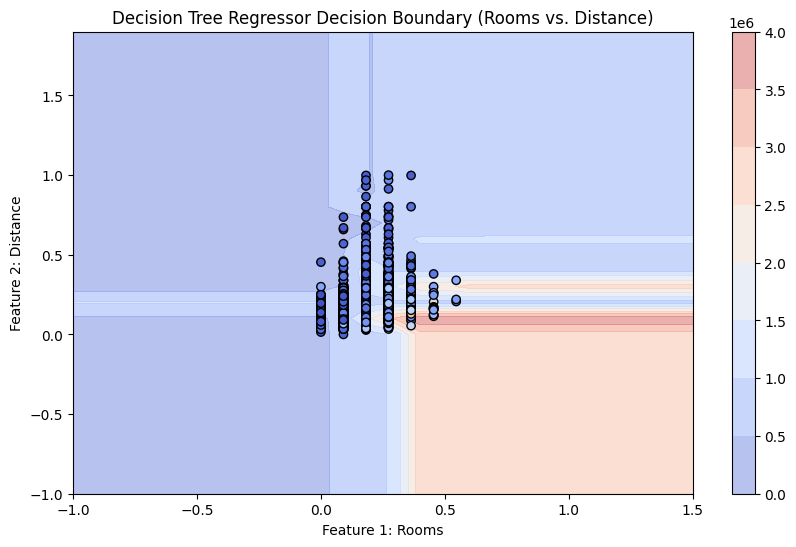

In [433]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Function to plot the decision boundary
def plot_decision_boundary(model, X, y, ax, title):
    # Create a mesh grid for the first two features
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict the price for each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and training points
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', marker='o', label='Data Points')
    ax.set_title(title)
    ax.set_xlabel('Feature 1: Rooms')
    ax.set_ylabel('Feature 2: Distance')
    return scatter

X_train_2D = X_train[:, [0, 1]]  # Indices for 'Rooms' and 'Distance'
X_test_2D = X_test[:, [0, 1]]   

# Fit the Decision Tree using the selected features
decision_tree_2D = DecisionTreeRegressor(random_state=1)
decision_tree_2D.fit(X_train_2D, Y_train)

# Plotting the decision boundary
fig, ax = plt.subplots(figsize=(10, 6))
plot_decision_boundary(decision_tree_2D, X_test_2D, Y_test, ax, "Decision Tree Regressor Decision Boundary (Rooms vs. Distance)")
plt.colorbar(ax.collections[0])  # Add a color bar to indicate the price levels
plt.show()



**3. Random Forest Regressor Model:**

In [434]:
from sklearn.ensemble import  RandomForestRegressor

In [435]:
random_forest = RandomForestRegressor(max_leaf_nodes=100, random_state=42)

In [436]:
random_forest.fit(X_train, Y_train)

RandomForestRegressor(max_leaf_nodes=100, random_state=42)

In [437]:
random_forest_predict = random_forest.predict(X_test)
random_forest_predict

array([ 821344.48792989,  832524.37558393,  700535.14995163, ...,
        359278.04125482,  809800.9240953 , 2601601.09386517])

In [438]:
random_forest_score = random_forest.score(X_test, Y_test)
random_forest_score

0.9996134093416641

In [439]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate regression metrics
random_forest_mse = mean_squared_error(Y_test, random_forest_predict)
random_forest_r2 = r2_score(Y_test, random_forest_predict)
random_forest_mae = mean_absolute_error(Y_test, random_forest_predict)

print("Random Forest Regressor Evaluation:")
print(f"Mean Squared Error (MSE): {random_forest_mse:.2f}")
print(f"R² Score: {random_forest_r2:.2f}")
print(f"Mean Absolute Error (MAE): {random_forest_mae:.2f}")


Random Forest Regressor Evaluation:
Mean Squared Error (MSE): 202261894.01
R² Score: 1.00
Mean Absolute Error (MAE): 3135.55


In [440]:
# Create a new row for the model 
new_row = pd.DataFrame({
    'model_name': [random_forest.__class__.__name__],
    'prediction_score': [random_forest_score],
    'mean_absolute_error': [random_forest_mae],
    'mean_squared_error': [random_forest_mse],
    'R^2 score': [random_forest_r2]
})

# Use pd.concat() to append the new row to the existing DataFrame
models_summary = pd.concat([models_summary, new_row], ignore_index=True)

# Display the updated DataFrame
models_summary

,model_name,prediction_score,mean_absolute_error,mean_squared_error,R^2 score
0,LinearRegression,0.859134,155181.442875,7.370009e+10,0.859134
1,DecisionTreeRegressor,0.999331,1851.797175,3.498614e+08,0.999331
2,RandomForestRegressor,0.999613,3135.547807,2.022619e+08,0.999613


**4. Bagging Regressor Model:**

In [441]:
from sklearn.ensemble import  BaggingRegressor 

In [442]:
# Model Fitting
bagging = BaggingRegressor(random_state=1)
bagging.fit(X_train, Y_train)

BaggingRegressor(random_state=1)

In [443]:
# Model Prediction
bagging_predict = bagging.predict(X_test)

# Model Score
bagging_score = bagging.score(X_test, Y_test)
print(bagging_score)

0.9993691954656633


In [444]:
# 3. Evaluate regression metrics
bagging_mse = mean_squared_error(Y_test, bagging_predict)
bagging_r2 = r2_score(Y_test, bagging_predict)
bagging_mae = mean_absolute_error(bagging_predict, Y_test)

# Print regression metrics
print(f"Bagging Regression Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {m_a_err:.2f}")

Bagging Regression Metrics:
Mean Squared Error: 73700092307.52
R² Score: 0.86
Mean Absolute Error: 155181.44


In [445]:
# Create a new row for the model 
new_row = pd.DataFrame({
    'model_name': [bagging.__class__.__name__],
    'prediction_score': [bagging_score],
    'mean_absolute_error': [bagging_mae],
    'mean_squared_error': [bagging_mse],
    'R^2 score': [bagging_r2]
})

# Use pd.concat() to append the new row to the existing DataFrame
models_summary = pd.concat([models_summary, new_row], ignore_index=True)

# Display the updated DataFrame
models_summary

,model_name,prediction_score,mean_absolute_error,mean_squared_error,R^2 score
0,LinearRegression,0.859134,155181.442875,7.370009e+10,0.859134
1,DecisionTreeRegressor,0.999331,1851.797175,3.498614e+08,0.999331
2,RandomForestRegressor,0.999613,3135.547807,2.022619e+08,0.999613
3,BaggingRegressor,0.999369,1660.015593,3.300331e+08,0.999369


**5. Ada Boost Regressor Model:**

In [446]:
from sklearn.ensemble import  AdaBoostRegressor

In [447]:
# Creating Model
ada_boost = AdaBoostRegressor()

# Model Fitting
ada_boost.fit(X_train, Y_train)

AdaBoostRegressor()

In [448]:
# Model Prediction
ada_boost_predict = ada_boost.predict(X_test)
ada_boost_predict

array([ 778960.58566345,  778960.58566345,  624633.89815713, ...,
        560321.98721649,  657389.45251799, 2569613.30202775])

In [449]:
# Model Score
ada_boost_score = ada_boost.score(X_test, Y_test)
ada_boost_score

0.985035721617113

In [450]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate regression metrics
ada_boost_mse = mean_squared_error(Y_test, ada_boost_predict)
ada_boost_r2 = r2_score(Y_test, ada_boost_predict)
ada_boost_mae = mean_absolute_error(Y_test, ada_boost_predict)

print("Random Forest Regressor Evaluation:")
print(f"Mean Squared Error (MSE): {ada_boost_mse:.2f}")
print(f"R² Score: {ada_boost_r2:.2f}")
print(f"Mean Absolute Error (MAE): {ada_boost_mae:.2f}")

Random Forest Regressor Evaluation:
Mean Squared Error (MSE): 7829219933.00
R² Score: 0.99
Mean Absolute Error (MAE): 67118.18


In [451]:
# Create a new row for the model 
new_row = pd.DataFrame({
    'model_name': [ada_boost.__class__.__name__],
    'prediction_score': [ada_boost_score],
    'mean_absolute_error': [ada_boost_mae], 
    'mean_squared_error': [ada_boost_mse],
    'R^2 score': [ada_boost_r2]
})

# Use pd.concat() to append the new row to the existing DataFrame
models_summary = pd.concat([models_summary, new_row], ignore_index=True)

# Display the updated DataFrame
models_summary

,model_name,prediction_score,mean_absolute_error,mean_squared_error,R^2 score
0,LinearRegression,0.859134,155181.442875,7.370009e+10,0.859134
1,DecisionTreeRegressor,0.999331,1851.797175,3.498614e+08,0.999331
2,RandomForestRegressor,0.999613,3135.547807,2.022619e+08,0.999613
3,BaggingRegressor,0.999369,1660.015593,3.300331e+08,0.999369
4,AdaBoostRegressor,0.985036,67118.180164,7.829220e+09,0.985036


**6. Gradient Boosting Regressor Model:**

In [452]:
from sklearn.ensemble import  GradientBoostingRegressor

In [453]:
# Creating Model
gradient_boosting = GradientBoostingRegressor(n_estimators=150, random_state=1)

# Model Fitting
gradient_boosting.fit(X_train, Y_train)

GradientBoostingRegressor(n_estimators=150, random_state=1)

In [454]:
# Model Prediction
gradient_boosting_predict = gradient_boosting.predict(X_test)
gradient_boosting_predict

array([ 822944.44191801,  839403.38677248,  695210.01644191, ...,
        351096.97088133,  803926.59461904, 2601000.57588533])

In [455]:
# Model Score
gradient_boosting_score = gradient_boosting.score(X_test, Y_test)
gradient_boosting_score

0.9997036191250809

In [456]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate regression metrics
gradient_boosting_mse = mean_squared_error(Y_test, ada_boost_predict)
gradient_boosting_r2 = r2_score(Y_test, ada_boost_predict)
gradient_boosting_mae = mean_absolute_error(Y_test, ada_boost_predict)

print("Random Forest Regressor Evaluation:")
print(f"Mean Squared Error: {gradient_boosting_mse:.2f}")
print(f"R² Score: {gradient_boosting_r2:.2f}")
print(f"Mean Absolute Error: {gradient_boosting_mae:.2f}")

Random Forest Regressor Evaluation:
Mean Squared Error: 7829219933.00
R² Score: 0.99
Mean Absolute Error: 67118.18


In [457]:
# Create a new row for the model 
new_row = pd.DataFrame({
    'model_name': [gradient_boosting.__class__.__name__],
    'prediction_score': [gradient_boosting_score],
    'mean_absolute_error': [gradient_boosting_mae], 
    'mean_squared_error': [gradient_boosting_mse],
    'R^2 score': [gradient_boosting_r2]
})

# Use pd.concat() to append the new row to the existing DataFrame
models_summary = pd.concat([models_summary, new_row], ignore_index=True)

# Display the updated DataFrame
models_summary

,model_name,prediction_score,mean_absolute_error,mean_squared_error,R^2 score
0,LinearRegression,0.859134,155181.442875,7.370009e+10,0.859134
1,DecisionTreeRegressor,0.999331,1851.797175,3.498614e+08,0.999331
2,RandomForestRegressor,0.999613,3135.547807,2.022619e+08,0.999613
3,BaggingRegressor,0.999369,1660.015593,3.300331e+08,0.999369
4,AdaBoostRegressor,0.985036,67118.180164,7.829220e+09,0.985036
5,GradientBoostingRegressor,0.999704,67118.180164,7.829220e+09,0.985036


## Model Type 2: Classification Models

**1. K-Means Clustering:**

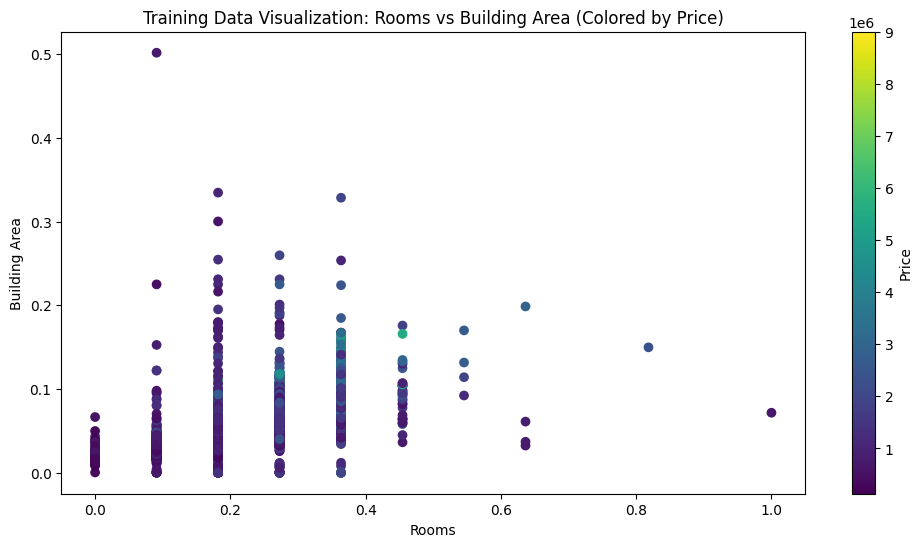

In [463]:
import matplotlib.pyplot as plt

# Select two features for visualization, for example, feature at index 0 ('Rooms') and index 1 ('Building Area')
feature_1 = 0  # Feature index for 'Rooms'
feature_2 = 7  # Feature index for 'Building Area'

# Plot the data
plt.figure(figsize=(12, 6))

# Create a scatter plot with the two selected features and color by 'Price' (target variable)
plt.scatter(X_train[:, feature_1], X_train[:, feature_2], c=Y_train, cmap='viridis')
plt.title('Training Data Visualization: Rooms vs Building Area (Colored by Price)')
plt.xlabel('Rooms')
plt.ylabel('Building Area')
plt.colorbar(label='Price')  # Color bar representing the target variable (Price)
plt.show()


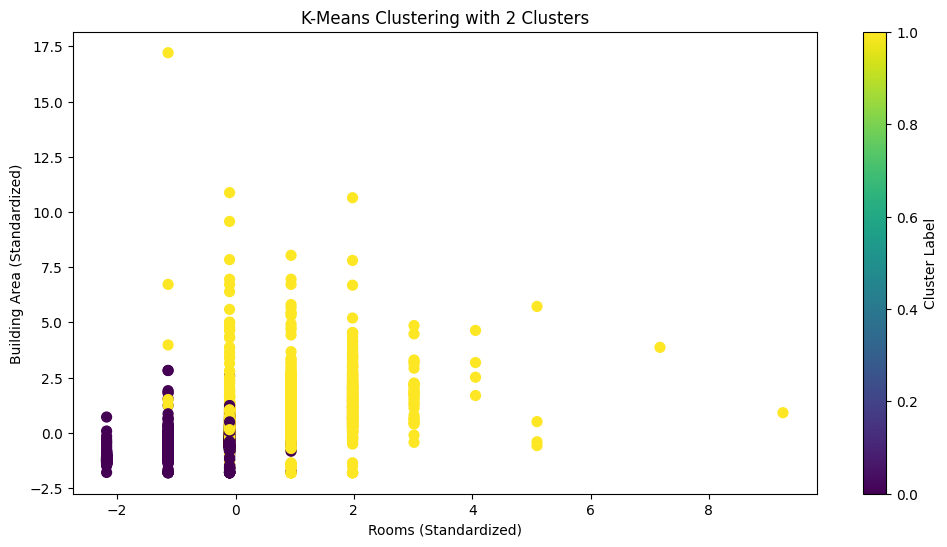

Predicted clusters for test data:
 [1 0 1 ... 0 0 1]
Centroids of the clusters:
 [[-0.66608346 -0.32453422 -0.20743645 -0.66316391 -0.5906559  -0.45503808
  -0.11036208 -0.56757381 -0.07107686  0.06937035 -0.43247752  0.06035721
  -0.05633428  0.44154491  0.00611948  0.04551089  0.01618693  0.17782563
  -0.00207725]
 [ 0.72502889  0.35325406  0.22579365  0.72185098  0.64292633  0.49530694
   0.12012864  0.61780158  0.07736685 -0.07550932  0.47074987 -0.06569856
   0.06131961 -0.48061968 -0.00666102 -0.04953841 -0.0176194  -0.19356241
   0.00226108]]
Silhouette Score: 0.125
Inertia: 116373.001


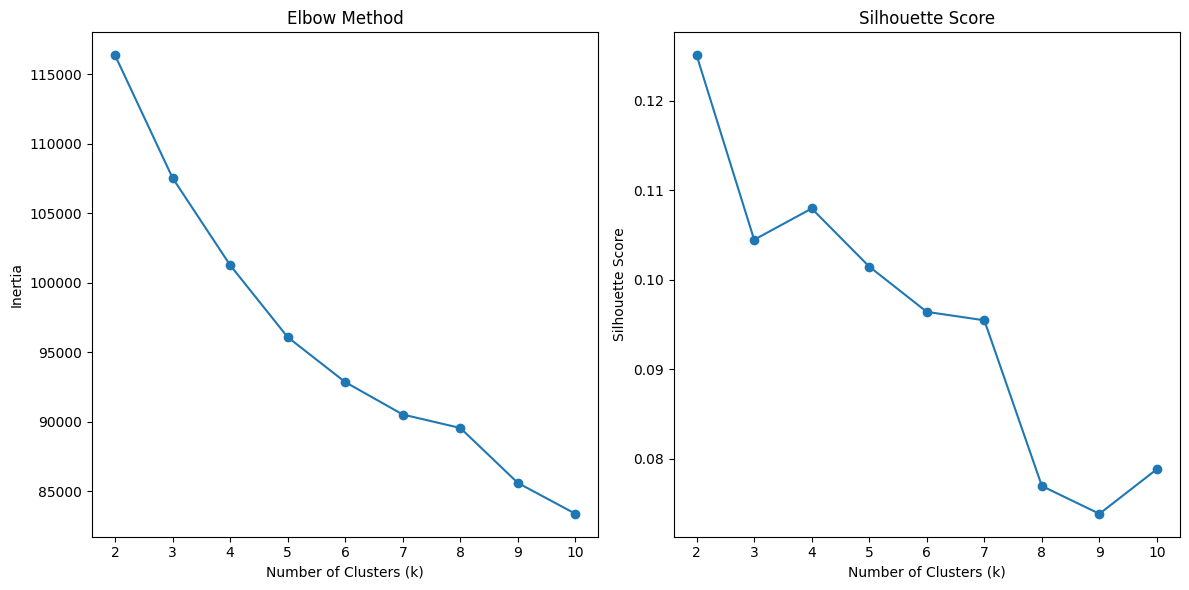

In [459]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)  # Standardize features in X_train

# Step 2: Apply K-Means Clustering
k = 2  # Best number after experimentation 
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Step 3: Predict the cluster for each data point
cluster_predictions = kmeans.predict(X_scaled)

# Step 4: Visualize the clusters using two features (e.g., 'Rooms' and 'Postcode')
plt.figure(figsize=(12, 6))

# Plotting the clusters on the first two features
plt.scatter(X_scaled[:, 0], X_scaled[:, 7], c=cluster_predictions, cmap='viridis', s=50)
plt.title(f'K-Means Clustering with {k} Clusters')
plt.xlabel('Rooms (Standardized)')
plt.ylabel('Building Area (Standardized)')
plt.colorbar(label='Cluster Label')
plt.show()

# Step 5: Use the .predict() method on new data or test data (optional)
# For example, predict the clusters for X_test data
X_test_scaled = scaler.transform(X_test)  # Standardize the test data
test_cluster_predictions = kmeans.predict(X_test_scaled)

# Print the predicted cluster labels for the test data
print("Predicted clusters for test data:\n", test_cluster_predictions)

# Optional: Print out the centroids
centroids = kmeans.cluster_centers_
print("Centroids of the clusters:\n", centroids)

# Step 6: Evaluate the clustering model
# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, cluster_predictions)
print(f'Silhouette Score: {silhouette_avg:.3f}')

# Calculate inertia
inertia = kmeans.inertia_
print(f'Inertia: {inertia:.3f}')

# Step 7: Optional - Elbow Method to find the optimal number of clusters
inertia_values = []
silhouette_scores = []

# Test a range of cluster counts
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plotting the elbow method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plotting silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [460]:
# Step 1: Detect or retrieve a single data point
# For example, let's say we want the 5th row from the dataset (index 4)
single_data_point = data.loc[4, training_features].values.reshape(1, -1)  # 1 row, N features

# Step 2: Standardize the data (same scaler used during training)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[training_features])  # Fit the scaler on the whole dataset
scaled_single_data_point = scaler.transform(single_data_point)  # Scale the single data point

# Step 4: Predict the cluster for the single data point
predicted_label = kmeans.predict(scaled_single_data_point)
print(f'The predicted cluster for the selected data point is: {predicted_label[0]}')

#Print the selected data point for reference
print(f'\nSelected data point (original features): {single_data_point}')

The predicted cluster for the selected data point is: 0

Selected data point (original features): [[np.int64(4) np.float64(11.2) np.int64(3073) np.int64(4) np.int64(2)
  np.int64(4) np.int64(820) np.float64(197.0) np.int64(1965)
  np.int64(21650) np.float64(13.527828485512494) np.int64(239)
  np.int64(8035) np.int64(0) np.int64(0) np.int64(183) np.int64(8)
  np.int64(6) np.int64(2)]]


c:\Users\Eight Tea Pea\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Model Type 3: Classification Models

**1. KNN:**

In [464]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Split your data into training and testing sets
# Assuming X and Y are your features and labels
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 2: Standardize the features
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Initialize and train the KNN model
# Tune k value - can use a range of values to see which performs best
best_k = 0
best_score = 0

# Iterate through a range of k values
for k in range(1, 21):  # Trying k values from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, Y_train)  # Train the model on the scaled training data
    knn_score = knn.score(X_train_scaled, Y_train)  # Evaluate on the training set

    # Update best k based on the training accuracy
    if knn_score > best_score:
        best_score = knn_score
        best_k = k

# Train the KNN model on the scaled training data using the best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, Y_train)

# Step 4: Predict on the test data
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the KNN model using the .score() method on the test data
test_score = knn.score(X_test_scaled, Y_test)

# Output the score (accuracy)
print(f'Best K: {best_k}')
print(f'KNN Model Score (Test Accuracy): {test_score:.2f}')

# Step 5: Additional evaluation metrics
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred_knn))

print("\nClassification Report:")
print(classification_report(Y_test, y_pred_knn, zero_division=0))


Best K: 1
KNN Model Score (Test Accuracy): 0.01

Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report:
              precision    recall  f1-score   support

      131000       0.00      0.00      0.00         0
      145000       0.00      0.00      0.00         1
      222000       0.00      0.00      0.00         1
      250000       0.00      0.00      0.00         2
      256500       0.00      0.00      0.00         0
      257500       1.00      1.00      1.00         1
      260000       0.00      0.00      0.00         1
      266000       0.00      0.00      0.00         1
      270000       0.00      0.00      0.00         1
      275000       0.00      0.00      0.00         2
      275500       0.00      0.00      0.00         1
      280000       0.00      0.00      0.00         0
      286000       0.00      0.00      0.00         1
      288000       0.00      0.0